# Introduction to Artiical Neural Network with Keras

# 1. Perceptron 
- Simplest ANN architecture 
- Based on Threshold Logical Unit (TLU) also called Linear Threshold Unit (LTU)
- inputs are numbers instead of binary on/off. 
- TLU computes $z=w_1x_1 + w_2x_2 + ... + w_n x_n  => z = x^Tw$ 
- Single TLU can be used for simple binary classification 
- Perceptron comprises of single layer of TLU with each TLU connected to inputs. When all neurons in a layer is connected to every neuron in previous layer - the layer is called Fully Connected Layer or dense layer. 
- Perceptron learning rule $w_{(i,j)}^{(next step)} = w_{(i,j)} + \eta (y_j - ^y_j) x_i$ ; where 
    - $w_{(i,j)} $ = connection weights between ith input and jth output neuron 
    - $x_i$ = ith instance of training instance 
    - $^y_j$ = output of jth neuron 
    - $y_j$ = target value of jth output neuron 
    - $\eta$ = learning rate

- The decision boundary of perceptron is linear therefore perceptron is incapable of learning complex patterns 
- However, if training instances are linearly separable, then algo would converge to a solution. This is Perceptron Convergence Theorem

In [1]:
# Scikit has a perceptron class which we use
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# load iris dataset 
iris = load_iris()

# get petal length and width 
X = iris.data[:, (2, 3)]

# get target values for sensota as True else false 
y = (iris.target == 0).astype(np.int64)

# create a perceptron with maximum epochs (passes in perceptron) as 1000, tolerance of e^-3 and random state=42
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)     

# predict if petal legnth=2 and width=0.5 is sentosa or not 
y_pred = per_clf.predict([[2, 0.5]])

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
y_pred

array([1])

In [4]:
per_clf.coef_

array([[-1.4, -2.2]])

In [5]:
per_clf.intercept_

array([4.])

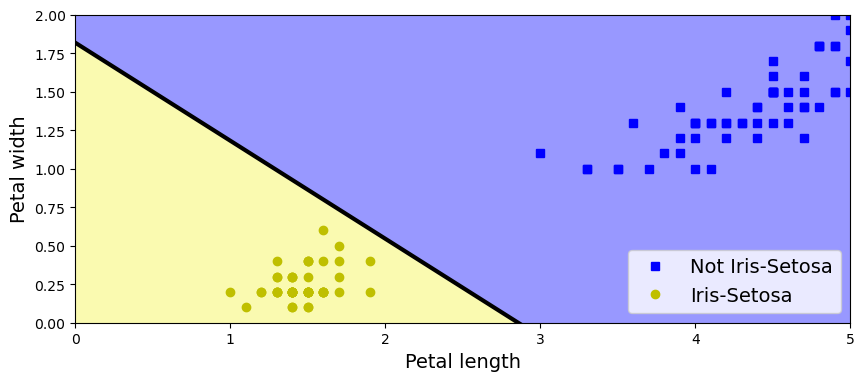

In [6]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from matplotlib.colors import ListedColormap

# calculate a & b using coefficient and intercept (unsure why?)
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

# get continous x0 and x1 data using axes values 
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# make prediction on generated set
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

# plot the points for X which are sentosa and not setosa 
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

# create the decision boundary 
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

# create custom color map 
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

# create color contour 
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# show the image
plt.show()

``` 
Scikit Perceptron model strongly resembles to Stochastic Gradient Descnet with following hyperparameters 
loss="perceptron", learning_rate=constant, eta0=1 and penalty=None 

Unlike Logistic regression pecenptron donot output probablity; rather it makes prediction on hard threshold. Reason why to use Logistic regression over perceptron 

Perceptron were incapable of solving XOR classificaton problem howevver can be dealt by stacking multiple perceptron. The resulting ANN model is called MultiLayer Perceptron (MLP)

```

### MultiLayer Perceptron(MLP) & Back propagation 
- MLP is composed of one pass through layer called input layer 
- one or more TLU (Threshold Logical Unit) layer is called Hidden Layer 
- Final layer is called output layer 
- Layer closer to input layer is called lower layer 
- Layer closer to output layer is called upper layer
- When ANN contains deep stack of hidden layer is called Deep Neural Network (DNN)
- Backpropagation training algo is efficient technique for computing gradient automatically in just 2 passes (backward and forward)
- Backpropagation can find how each connection weights and each bias term should be tweaked in order to reduce error. 
- Automatically computing gradient desecent is called auotmatic differentiation (AUTODIFF)


### ALGO DETAILS: 
- Algo handles one mini-batch at a time containing subset of training instances and which goes through full training set multiple times. Each pass is called EPOCH 
-  Each mini-batch is passed to n/w input layer which sents first to hidden layer. Algo computes output from all neuron in this layer (for every instances in mini-batch). the reuslt is passed to next layer until we get to the last output layer. This is same as making predicitons except the intermediate results are preserved as they need backward pass 
-  Algo calculates the n/w err using loss function (compare the actual value with desired value)
-  Algo calculates how mych n/w err output connection contributed to the error. This is done using Calcus CHAIN RULE 
-  Algo then measures how much error each layer contributed using CHAIN RULE. Working backwards until it finds input layer. This reverse pass efficiently measures error gradient acorss all connections weights in the network 
- Finally algo performs Gradient Descent step to tweak all connection weights in network using error descent. 

NOTE -  It is important to initialize the connection weights randomly else training will fail. 


# 2. Activation Function

if we have a step funciton like 
$
f(z) = \begin{cases}
    0, & \text{if } z < 0 \\
    1, & \text{if } z >= 1 
\end{cases}
$ in that case the gradient will not work. By default author's have used Sigmoid activation funciton 
<br><br>

Sigmoid Function: $ \sigma(z) = 1/{(1+\exp^{-z})}$<br>
Hyperbolic Tangent Function: $ tanh(z) = 2 \sigma (2z) -1 $ <br>
Rectified Linear Unit Function: $ ReLu(z) = max(0,z)$ 

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

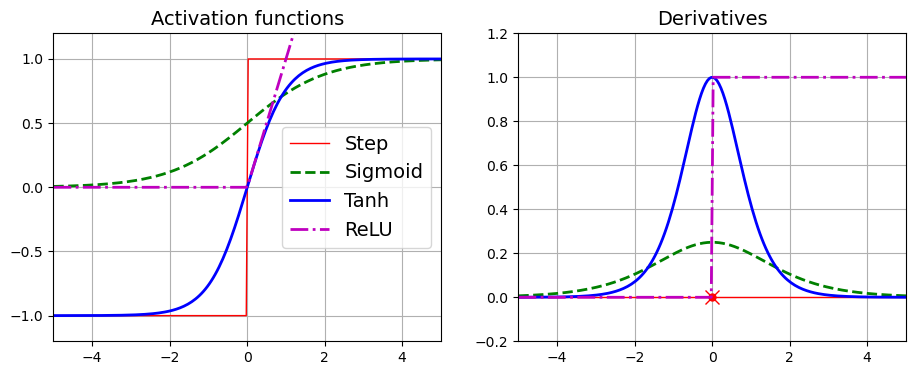

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# plot function 
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# plot the derivatives 
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [9]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

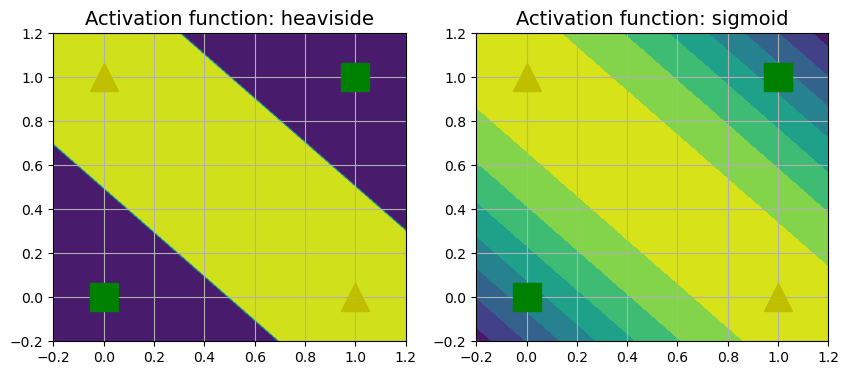

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### Regression MLP
- MLP can be used for regression task
- When we want to make prediction only on one value e.g. Housing Price -> we need just one Neuron 
- Multivariate Regression (multiple values at once) -> you will need one Neuron per dimension e.g. predicting center of image will require two cordinates in 2D plane; therefore you need 2 neurons 
- When using MLP for regression; you done need to use the activation function for output layer. they are free to output any range of values. But if you want ensure output values are positive - you can use ReLU Activation 
- You can also use SOFTPLUS which is soft variant for ReLU denoted as $softplus(z) = log(1+e^z)$ which is close to 0 when z is negative and close to z when z is positive 
- loss function to use during training is MSE (Mean Squared Error). but if there are lots of outliers you want to use MAE (Mean Absolute Error) or Huberloos (combination of both MSE and MAE)

### Huberloss 
- It is quadratic function and when error is smaller than the threshold (denoted as $\delta$). 
- It is linear when error is larger than $\delta$. Linear part makes it sensitive to outlier than MSE 
- It is quadratic when error is smaller than $\delta$. Quadratic part makes it to converge faster and more precise than MAE 

### Typical Regression using MLP
``` 
a. Input Neuron: one per input feature (e.g. MNIST dataset will have 28x28 = 784)
b. Hidden Layer: Depending on the problem; typically 1 to 5 
c. Neurons per hidden layer: Depending on the problem; typically 10 to 100 
d. output neuron: one per predicted dimension 
e. Hidden activation: ReLU or SeLU 
f. O/P activation: None, ReLU/softplus (if positive output) or Logistic/tanh (if bounded output)
g. loss function: MSE or MAE/Huberloss (if outliers are more)

### Classification MLP 
- MLP can be used for classification task 
- For binary classfication - one neuron in output layer using logistic activation function 
- the output will be in range 0 to 1; which can be interpreted as estimated probablity of positive class 
- estimated probablity of negative class is negative of the number 
- MLP can handle multilabel classification as well e.g. email classifier which can classify email as spam/ham and urgent/non-urgent. In this case 2 neurons at output layer needed both using logistic activation 
- MLP can also handle multiclass e.g. digits between 0 to 9 -> here we need 10 neurons in output layer with softmax activation funciton. Softmax will ensure the estimated probablity is between 0 and 1 
- Loss function - since we are predicting probablity; cross entropy loss (also called log lass) is generally a good choice 

In [11]:
#### Validate if tensorflow is installed 
import tensorflow as tf 
from tensorflow import keras 
tf.__version__, keras.__version__


('2.19.0', '3.9.2')

### 3. Building Image classifier using sequential API 
``` 
Fashion MNIST dataset to be used. It has same format 70,000 grayscale image of 28x28 pixel each with 10 classes. Image however refers to fashion instead of digit image. 
Simple linear model reaches over 92% accuracy on MNIST and about 83% on Fashion MNIST

The key difference while loading Fashion MNIST using Keras rather than scikit-learn is that every image is represented as 28x28 array rather than 1D array of 784. Also pixel intensity are represented in integer between 0 to 255 instead of float. 


In [12]:
# import fashion MNIST dataset 
fashion_mnist = keras.datasets.fashion_mnist 
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [14]:
# Data in fashion mnist is already split into training and test set. But there is no validation set. Let's create one 
# scale the pixel intensity between 0 and 1 by dividing by 255.0 (also convert them into float)
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
y_train[:10]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4], dtype=uint8)

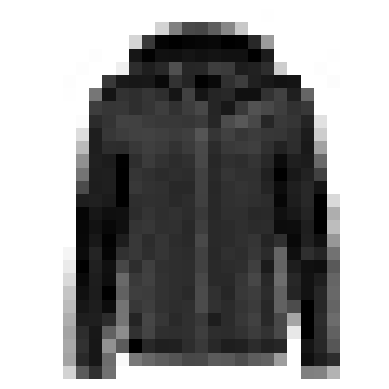

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
# there is no class names mentioned in the fashion mnist 
class_names = [ 
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


In [18]:
class_names[y_train[0]]

'Coat'

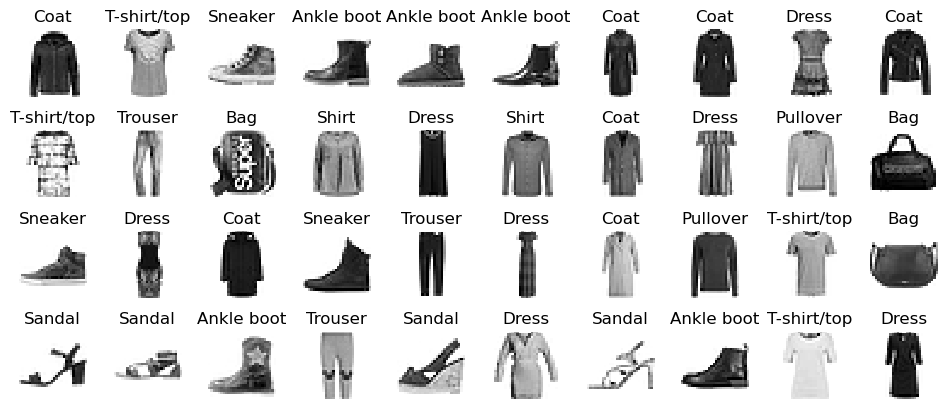

In [19]:
# print first 40 images from the fashion mnist training set 
n_rows = 4
n_cols = 10

# set figure size 
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

# iterate over each row and fill the columns 
for row in range(n_rows):
    for col in range(n_cols):

        # get index 
        index = n_cols * row + col

        # create subplot 
        plt.subplot(n_rows, n_cols, index + 1)

        # print the image 
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')

        # get the class name 
        plt.title(class_names[y_train[index]], fontsize=12)

# add some white space and horizontal spaces 
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

```
creating model from keras
```

In [20]:
# create sequential model 
model = keras.models.Sequential()

# add input layer of 28 x 28 - alternatively you can use keras.layers.InputLayer with input_size=[28, 28]. 
# this will flatten the data from 28 x 28 to 1D array of 784 
model.add(keras.layers.Flatten(input_shape=[28, 28]))

# create 300 neurons in hidden layer with activation as relu 
model.add(keras.layers.Dense(300, activation="relu"))

# create second hidden layer with activation relu 
model.add(keras.layers.Dense(100, activation="relu"))

# create output layer of 10 (10 classes) with softmax activation 
model.add(keras.layers.Dense(10, activation="softmax"))

model.layers

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [21]:
# revert the changes and you can also create sequential model using all these add features passed as parameters e.g. 
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

```
model.summary() method displays all layers including each layer's name (layer names are automatically generated unless you provide them). 

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

```
This displays all the layers and output shape (None here implies batch size can be anything). It ends with number of parameters both trainable and non-trainable. Here we have only trainable parameters. 
Dense layers often has lots of parameters e.g. first hidden layer has 784x300 connection weights = 235200 and 300 bias weights so 235200+300 = 235500. The model gives a lot of flexibility to fit the training data, but it also means the model runs the risk of overfitting, especially when you dont have a lot of training data.

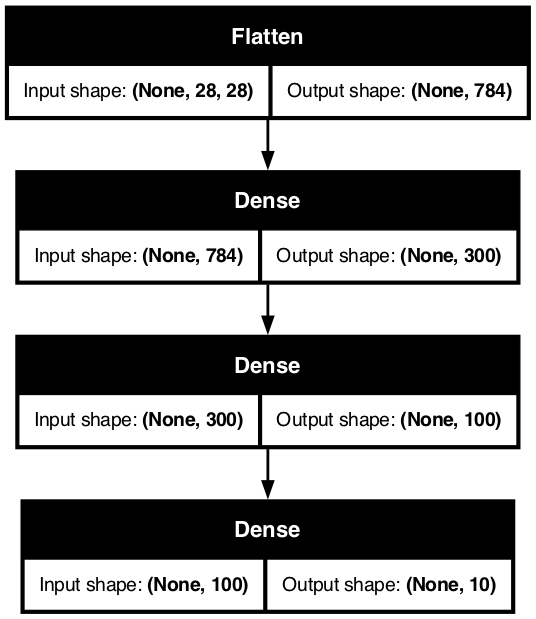

In [24]:
# plot the model 
keras.utils.plot_model(model, "/users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_fashion_mnist_model.png", show_shapes=True, dpi=100)

### Accessing layers of model

In [25]:
# by name 
hidden_1 = model.layers[1]
hidden_1.name

'dense'

In [26]:
model.get_layer(hidden_1.name) is hidden_1

True

In [27]:
weights, biases = hidden_1.get_weights()

In [28]:
weights[:10]

array([[-0.02254715,  0.07230337,  0.0490628 , ..., -0.0565447 ,
         0.0576966 , -0.03310116],
       [-0.04155144,  0.06594662,  0.03910328, ...,  0.00905732,
         0.06743042,  0.03975917],
       [ 0.02378616,  0.05511053, -0.03071405, ...,  0.01166017,
        -0.01241581,  0.04644229],
       ...,
       [-0.03501571, -0.07415908, -0.06506637, ...,  0.05516261,
        -0.02770766,  0.03464939],
       [ 0.01986107,  0.02357394, -0.05725089, ..., -0.06100869,
        -0.0413069 ,  0.04524341],
       [ 0.05461225, -0.0566794 , -0.03211612, ..., -0.05643284,
        -0.02381686,  0.04791032]], dtype=float32)

In [29]:
biases[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [30]:
weights.shape

(784, 300)

In [31]:
biases.shape

(300,)

``` 
It is always better to provide the input_size when creating the model. If not specified, Keras will wait until training data is provided, or build() method is called. If model is not built weights will not be there and we will not be able to do certain things like summary() or plot_model() 

### Compiling the model

```
 after model is created, you must call its compile() method to specify loss function and optimizer to use. Optionally provide the metric to use during training and evaluation

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

```
we used sparse_categorical_crossentropy loss function because we have sparse labels i.e. for each instance there is just a target index 0 to 9 and classes are exclusive. 
If we had one target probablity per class for each instance e.g. one-hot vectors like [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] to represent a class we would have used "categorical_crossentropy" instead. 

If we were doing binary classification then we would have used sigmoid logistic activation function instead of softmax activation in output layer and we would have used "binary_crossentropy" loss function. 

optimizer = "sgd" implies model is using SGD i.e. backpropagation algo (reverse-mode autodiff plus gradient descent) will use Stochastic Gradient Descent 

Finally classifier measurement will be done on accuracy

In [33]:
# now the model is created and compiled ; let's train the model with input data. Passing validation set is optional 
# if passed keras will measure performance on training and validation set. 
# if training score > validation score -> Model is overfitting
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6753 - loss: 1.0125 - val_accuracy: 0.8242 - val_loss: 0.5154
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8255 - loss: 0.4991 - val_accuracy: 0.8510 - val_loss: 0.4477
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8437 - loss: 0.4451 - val_accuracy: 0.8570 - val_loss: 0.4156
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8540 - loss: 0.4156 - val_accuracy: 0.8650 - val_loss: 0.3931
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8621 - loss: 0.3942 - val_accuracy: 0.8680 - val_loss: 0.3792
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8665 - loss: 0.3777 - val_accuracy: 0.8708 - val_loss: 0.3674
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8703 - loss: 0.3644 - val_accuracy: 0.8740 - val_loss: 0.3588
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8741 - loss: 0.3530 - 

```
By default epoch is set to 1. Not sufficient for model to converge 
During fit() method you can provide 
    - validation_data: this will help to calculate the validation accuracy/metric you have set in the compile time 
    - or you can also specify validation_split=0.1 which tells keras to use last 10% of training data before shuffling use as validation set

validation_split is the ratio you provide. 

Keras store the metric details in history dictionary. epoch is epoch list.

In [34]:
print (history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [35]:
# get the accuracy and loss for training and validation set 
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

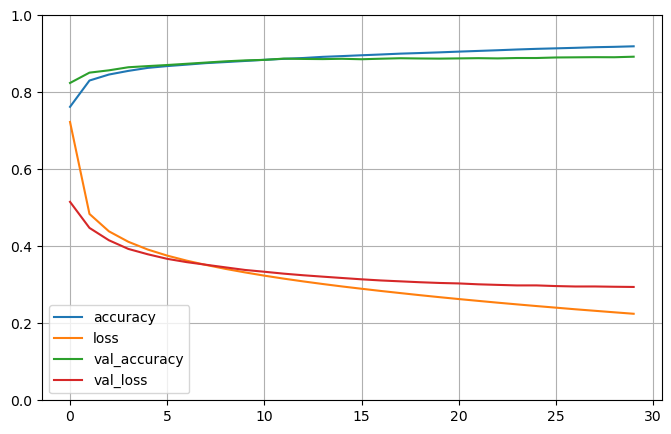

In [36]:
# Plot accuracy vs loss for training and validation set
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

```
You can see the accuracy is increasing & loss is decreasing for every epoch both for training and validation set. 

``` 
If model performance is not good; you can try - 
a. check the learning rate and tweak it 
b. check if changing optimizer helps 
c. try chaning the number of layer and number of neurons per layer
d. try other mechanism like chaning the batch_size (currently defaulted to 32)

The hyperparameter can be tuned and fit() method can be called on the model again. Keras is continous model i.e. keeps learning. 

DONOT tune hyperparameters after running the test set. 

In [37]:
# evaluate the model on 
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.8439 - loss: 69.9595


[72.08607482910156, 0.8391000032424927]

In [38]:
# predict using the model 
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [39]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([9, 2, 1])

In [40]:
# get the class names 
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [41]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

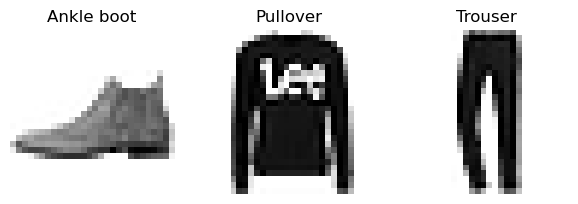

In [42]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 4. Regression Problem using Sequential API 

``` 
Use Calfornia Housing problem. All features are numeric; there is no ocean_proximity. There are no missing values as well. 

In [43]:
# import scikit packages for dataset, train and test split and standard scalar 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get housing dataset 
housing = fetch_california_housing()


In [44]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [45]:
print (housing.data[:10])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]
 [ 4.03680000e+00  5.20000000e+01  4.76165803e+00  1.10362694e+00
   4.13000000e+02  2.13989637e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.65910000e+00  5.20000000e+01  4.93190661e+00  9.51361868e-01
   1.09400000e+03  2.12840467e+00  3.78400000e+01 -1.22250000e+02]
 [ 3.12000000e+00  5.20000000e+01  4.79752705e+00  1.06182380e+00
   

In [46]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [47]:
housing.target[:10]

array([4.526, 3.585, 3.521, 3.413, 3.422, 2.697, 2.992, 2.414, 2.267,
       2.611])

In [48]:
housing.target_names

['MedHouseVal']

In [49]:
# split the training and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [50]:
# Create standard scaler object 
scaler = StandardScaler()

# convert the training, validation and test set using standard scaler
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

``` 
To make prediction - everything will be same as classification task except here we will have single neuron at output layer predicting the median house value and use no activation function for output layer
loss function will be mean_squared_error 
Since the data is noisy we will use single layer of neuron with fewer neuron may be to avoid overfitting

In [51]:
model = keras.models.Sequential([
    keras.layers.Dense(30, input_shape=X_train.shape[1:], activation="relu"),
    keras.layers.Dense(1)
])

# compile the model 
model.compile(loss="mean_squared_error", optimizer="sgd")

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 301 (1.18 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 1.2179 - val_loss: 0.6371
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.5931 - val_loss: 0.6457
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.6154 - val_loss: 0.8580
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 0.6288 - val_loss: 0.4811
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 584us/step - loss: 0.4668 - val_loss: 0.4660
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.4510 - val_loss: 0.4570
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.4417 - val_loss: 0.4503
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.4345 - val_loss: 0.4447
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - loss: 0.4284 - val_loss: 0.4395
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - loss: 0.4226 - val_loss: 0.4345
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - loss: 0.4172 - val_loss: 0.4303
Epoch 12/20
363/363 ━━━━━━━━━━

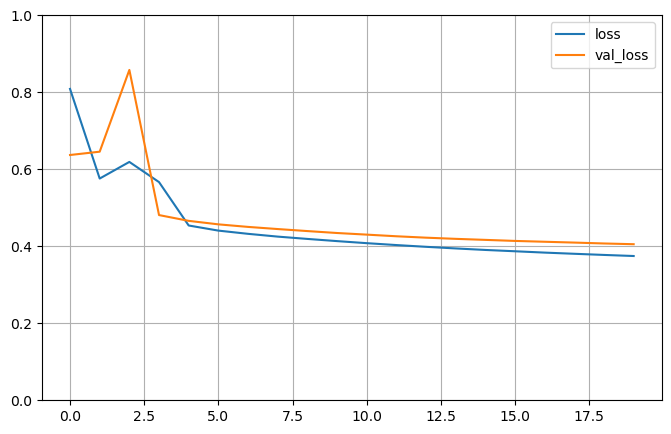

In [54]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.show()

In [55]:
# check this on test set 
mse_test=model.evaluate(X_test, y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - loss: 0.3937


In [56]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [57]:
y_pred

array([[0.47521845],
       [1.6670341 ],
       [3.5237453 ]], dtype=float32)

In [58]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

### SELF

``` 
Lets try to create input layer, one hidden layer and one output layer 


In [59]:
X_train.shape[1:]

(8,)

In [60]:
model_1 = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1)
])

# compile the model 
model_1.compile(loss="mean_squared_error", optimizer="sgd")

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [61]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 100)            │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,001 (3.91 KB)

 Trainable params: 1,001 (3.91 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history=model_1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 1.4086 - val_loss: 0.8759
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.6237 - val_loss: 0.5049
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - loss: 0.4921 - val_loss: 0.5147
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.4945 - val_loss: 0.4618
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.4491 - val_loss: 0.4532
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - loss: 0.4403 - val_loss: 0.4414
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.4264 - val_loss: 0.4358
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.4196 - val_loss: 0.4282
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step - loss: 0.4109 - val_loss: 0.4224
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.4057 - val_loss: 0.4166
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.3990 - val_loss: 0.4142
Epoch 12/20
363/363 ━━━━━━━━━━

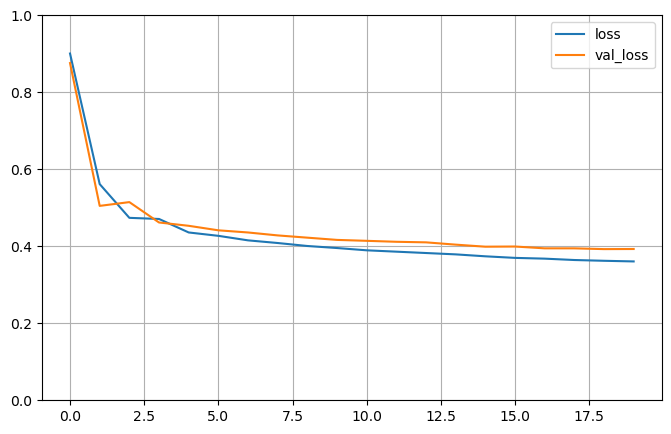

In [63]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend()
plt.show()

In [64]:
# check this on test set 
mse_test=model_1.evaluate(X_test, y_test)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - loss: 0.3754


In [65]:
X_new = X_test[:3]
y_pred = model_1.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [66]:
y_pred

array([[0.55004203],
       [1.5953333 ],
       [3.744142  ]], dtype=float32)

In [67]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

### Building Complex models using Functional API 

``` 
One example of non sequential neural network is WIDE & DEEP NEURAL NETWORK
Connects all or part of inputs directly to the output 
Helps to learn both deep and wide patterns within in the data 
Regular MLP forces all data to flow through full stack of layers, thus simple patterns may end up being distorted by sequence of transformation. 

Using Wide and Deep Pattern for California Housing Problem

In [68]:
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
X_train.shape, X_train.shape[1:]

((11610, 8), (8,))

In [70]:
# there will be 8 inputs 
input_ = keras.layers.Input(shape=X_train.shape[1:])

# create deep layer with 2 hidden layers passing previous layer as input 
hidden_1 = keras.layers.Dense(30, activation="relu")(input_)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)

# create concatenation layer to concatenate input with hidden layer 2 
concat = keras.layers.Concatenate()([input_, hidden_2])

# create output layer with no activation funciton and pass concat layer as input 
output = keras.layers.Dense(1)(concat)

# create model 
model = keras.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 30)        │        270 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 30)        │        930 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_3[0]… │
│ (Concatenate)       │                   │            │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

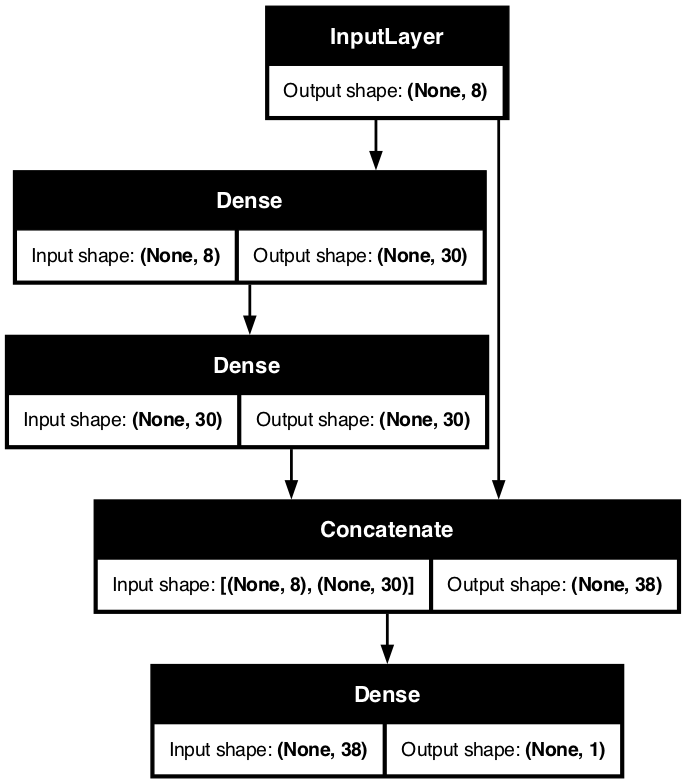

In [71]:
# plot the model 
keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [72]:
# compile the model - CHECK we have passed the learning rate within the optimizer itself
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [73]:
# fit the data 
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# evaluate the model and get the RMSE for test set 
test_rmse = model.evaluate(X_test, y_test)

# predict the first 3 instances of the test set 
y_pred = model.predict(X_new)

Epoch 1/20
223/363 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - loss: 4.3222

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 3.6086 - val_loss: 0.8412
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.7842 - val_loss: 0.7129
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.6907 - val_loss: 0.6713
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 0.6496 - val_loss: 0.6382
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.6174 - val_loss: 0.6114
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.5914 - val_loss: 0.5896
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.5701 - val_loss: 0.5716
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.5527 - val_loss: 0.5567
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.5382 - val_loss: 0.5441
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - loss: 0.5260 - val_loss: 0.5335
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.5158 - val_loss: 0.5243
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_11']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


In [74]:
test_rmse

0.47021156549453735

In [75]:
y_pred

array([[0.72292006],
       [1.6609931 ],
       [3.0957832 ]], dtype=float32)

In [76]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

``` 
Creating network with multiple inputs 
```

In [77]:
np.random.seed(42)
tf.random.set_seed(42)

In [78]:
# create two input layers with size 5 and 6 respectively
input_a = keras.layers.Input(shape=[5], name="wide_input")
input_b = keras.layers.Input(shape=[6], name="deep_input")

# create deep layer 
hidden_1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)

# create concatenation layer OR you can use keras.layers.concatenate([input_a, hidden_2]). Notice one is class and another is contructor 
concat = keras.layers.Concatenate()([input_a, hidden_2])

# create output layer 
output = keras.layers.Dense(1, name="output_layer")(concat)

# create model 
model = keras.Model(inputs=[input_a, input_b], outputs=[output])

model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 30)        │        930 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_11[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_layer        │ (None, 1)         │         36 │ concatenate_1[0]… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

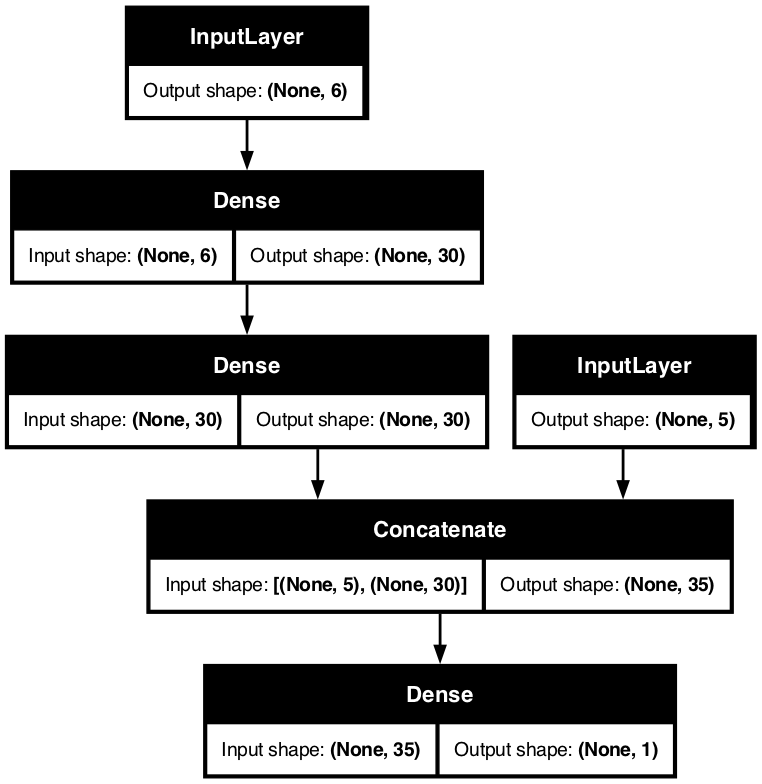

In [79]:
# plot the model 
keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [80]:
# compile this model 
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

``` 
Since input needs to be provided in 2 parts you need to perform same for train, test and validation set 

In [81]:
X_train[:, :5].shape, X_train[:, 2:].shape

((11610, 5), (11610, 6))

In [82]:
# divide training data based on number of features one taking first 5 inputs and another one taking from column 2 (i.e. ignoring logitude and latitude)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

# take first 3 instances of training and test set 
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [83]:
history=model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

# get the rmse for test data 
test_rmse = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - loss: 3.6863 - val_loss: 1.0392
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 0.9211 - val_loss: 0.7143
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.7059 - val_loss: 0.6403
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.6422 - val_loss: 0.6029
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 0.6064 - val_loss: 0.5775
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.5809 - val_loss: 0.5593
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 0.5625 - val_loss: 0.5460
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.5488 - val_loss: 0.5359
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 0.5380 - val_loss: 0.5280
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 0.5294 - val_loss: 0.5219
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 0.5226 - val_loss: 0.5169
Epoch 12/20
363/363 ━━━━━━━━━━

In [84]:
test_rmse

0.48698705434799194

In [85]:
y_pred = model.predict((X_new_A,  X_new_B))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[0.630456 ],
       [1.7855532],
       [3.0455487]], dtype=float32)

In [86]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

``` 
Multiple output using Wide and Deep 
There are mutliple use cases for mutliple outputs: 
a. Task may demand it: you want to locate center of image and classify the object in image. This makes both regression and classification task 
b. Tasks may be independent: you would like to perform independent tasks; building neural network with multiple outputs may help. For instance classify image of a person is similing or not and at the same time identifying if person is wearning glasses 
c. Regularization: You may want to regularize the overfitting model. Creating an aux output to ensure underlying part of network learns something useful of its own without relying too much on the network.

Adding auxillary output is easy however each output will require its own loss function. Therefore when compiling model, pass list of losses or map the dictionary for each output 
If only one loss used, Keras will assume same loss to be used for all outputs. 
Also we care more about real output than auxillary output thus setting higher weights for output than aux output will help

In [87]:
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
input_a = keras.layers.Input(shape=[5], name="wide_input")
input_b = keras.layers.Input(shape=[6], name="deep_input")

hidden_1 = keras.layers.Dense(30, activation="relu")(input_b)
hidden_2 = keras.layers.Dense(30, activation="relu")(hidden_1)

concat = keras.layers.concatenate([input_a, hidden_2])

output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden_2)

model = keras.models.Model(inputs=[input_a, input_b], 
                           outputs=[output, aux_output])

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ deep_input          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 30)        │        210 │ deep_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ wide_input          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 30)        │        930 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 35)        │          0 │ wide_input[0][0], │
│ (Concatenate)       │                   │            │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ main_output (Dense) │ (None, 1)         │         36 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aux_output (Dense)  │ (None, 1)         │         31 │ dense_13[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,207 (4.71 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

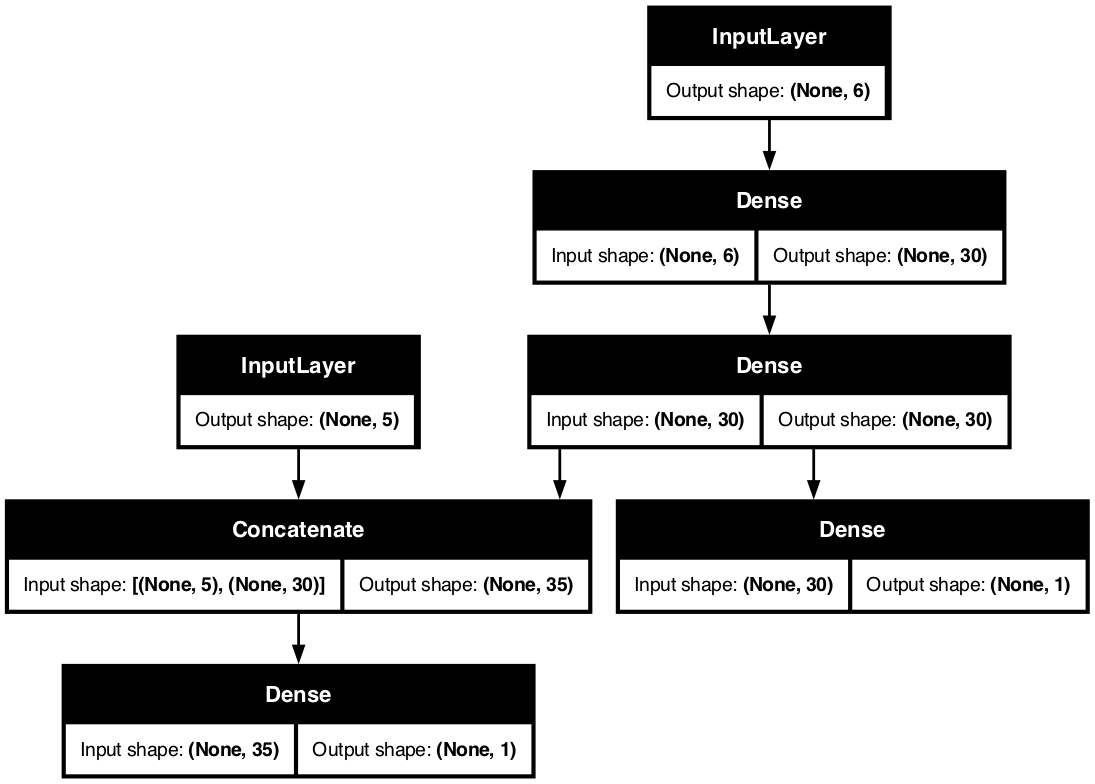

In [89]:
# plot the model 
keras.utils.plot_model(model, show_shapes=True, dpi=100)

In [90]:
# compile model 
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [91]:
# train the model - provide 2 outputs as there are two outputs 
history=model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - aux_output_loss: 4.7205 - loss: 3.7004 - main_output_loss: 3.5870 - val_aux_output_loss: 2.6685 - val_loss: 1.2262 - val_main_output_loss: 1.0657
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - aux_output_loss: 2.4011 - loss: 1.1177 - main_output_loss: 0.9751 - val_aux_output_loss: 1.8208 - val_loss: 0.8986 - val_main_output_loss: 0.7959
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - aux_output_loss: 1.7168 - loss: 0.8810 - main_output_loss: 0.7881 - val_aux_output_loss: 1.5043 - val_loss: 0.7886 - val_main_output_loss: 0.7089
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - aux_output_loss: 1.4594 - loss: 0.7835 - main_output_loss: 0.7083 - val_aux_output_loss: 1.3624 - val_loss: 0.7259 - val_main_output_loss: 0.6550
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - aux_output_loss: 1.3409 - loss: 0.7237 - main_output_loss: 0.6551 - val_aux_output_loss: 1.2824 - val_loss: 0.6817 - val_main_output_los

In [92]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - aux_output_loss: 0.9238 - loss: 0.5148 - main_output_loss: 0.4693
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [93]:
y_pred_main, y_pred_aux

(array([[0.5661062],
        [1.7862728],
        [2.8402214]], dtype=float32),
 array([[1.015686 ],
        [1.7170042],
        [2.0564966]], dtype=float32))

### Using subclassing API to build dynamic model

``` 
Both sequential and functional api are declarative i.e. you should start by declaring which layer you want and how to connect them. Only then you can start feeding model with data
this comes with own set of pros and cons 
Pros - 
a. models can be saved, cloned and shared
b. structure can be displayed and analyzed
c. framework can infer shapes and check types so errors can be tracked easily

Cons - 
a. Model is static 
b. some model requires programming techniques like branching, looping, steps etc... 

You can create wide and deep model class by inherting the model class. you can implement what is needed in the class 
it will be flexible but comes with a cost - you cannot save or clone the model 

In [94]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

    def get_summary(self):
        return self.summary()
    
    
model = WideAndDeepModel(30, activation="relu")


In [95]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [96]:
# You will not be able to get the summary details of the model 
model.get_summary()

Model: "wide_and_deep_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Saving and restoring the models

``` 
Keras use HDF5 file format to save the model. Currently with newer versions you can save in native Keras format
If training lasts for hours - you should not only save model at the end of training; also issue checkpoint at regular interval during training using callback method within fit() function

In [97]:
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
# create the model 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
# compile and train the model 
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 3.2696 - val_loss: 0.8714
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.8274 - val_loss: 0.7508
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - loss: 0.7374 - val_loss: 0.7012
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 596us/step - loss: 0.6887 - val_loss: 0.6634
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.6523 - val_loss: 0.6328
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.6230 - val_loss: 0.6075
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.5988 - val_loss: 0.5863
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5783 - val_loss: 0.5685
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 0.5609 - val_loss: 0.5537
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.5464 - val_loss: 0.5413
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - loss: 0.5376


In [100]:
# save the model 
model.save("/Users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_keras_model.h5")

In [101]:
# You can also save the model in native keras format 
model.save("/Users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_keras_model.keras")

In [102]:
# load from legacy H5 format 
model=keras.models.load_model("/Users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_keras_model.keras")

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [103]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[1.0270553],
       [1.3871949],
       [2.6474097]], dtype=float32)

### Using Callbacks during training
```
Keras lets you specify list of objects keras will: 
- call at the start and end of the training, 
- call at the start and end of each epoch 
- call even before processing any batch

you can create checkpoint file using keras.callbacks.ModelCheckpoint() method 

Moreover if you have used validation set during training, you can store the best model performance using save_best_only=True parameter. This way once your training is complete you can simply restore the model to last saved model after training

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
# create a sequential model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [106]:
# compile the model 
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [107]:
# create checkpoint object to save the best model 
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_keras_model.keras", save_best_only=True)

In [108]:
# train the model and use callback to perform checkpoint 
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 3.0375 - val_loss: 0.8637
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 0.8144 - val_loss: 0.7170
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 0.7133 - val_loss: 0.6790
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.6755 - val_loss: 0.6511
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.6471 - val_loss: 0.6278
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.6234 - val_loss: 0.6077
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 0.6028 - val_loss: 0.5903
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.5848 - val_loss: 0.5748
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.5686 - val_loss: 0.5610
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - loss: 0.5541 - val_loss: 0.5486


In [109]:
# save the nodel 
model = keras.models.load_model("/Users/rohitabhishek/Python_Workspace/hands-on-ml/SELF/OUTPUT/Chapter10/my_keras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 0.5418


``` 
Another way to implement early stopping is to use EarlyStopping callback. It will interrupt training if it measures no progress on validation set for number of epochs (defined by paitence parameter) and it will rollback to the best model. One can combine both callback and early stopping. 

In [110]:
# using callback for early stopping 
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# create early stopping checkppoint
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

# evaluate model uising test data
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - loss: 0.5411 - val_loss: 0.5377
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.5295 - val_loss: 0.5280
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.5191 - val_loss: 0.5197
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.5099 - val_loss: 0.5121
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 0.5016 - val_loss: 0.5051
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - loss: 0.4943 - val_loss: 0.4989
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 0.4875 - val_loss: 0.4932
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.4815 - val_loss: 0.4881
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 0.4762 - val_loss: 0.4836
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 0.4714 - val_loss: 0.4793
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.4669 - val_loss: 0.4756
Epoch 12/100
363/36

```
if you need more control you can easily write your own callback,. Example below will display the ratio between validation loss and traomomg loss during training. 

In [111]:

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [112]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

347/363 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - loss: 0.3593
val/train: 1.09
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.3589 - val_loss: 0.3838


# 5. Tensorboard

In [113]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [114]:
# create a root directory where all logs can be pushed for publishing to tensorboard 
import os 
root_logdir = os.path.join(os.curdir, 'DATA/Tensorboard_Logs')

def get_run_logdir(chapter="Chapter10"):
    import time 
    run_id = time.strftime(f"{chapter}_%Y%m%d%H%M%S")
    return os.path.join(root_logdir, run_id)

In [115]:
run_logdir = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - loss: 0.3583 - val_loss: 0.3834
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - loss: 0.3578 - val_loss: 0.3828
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3572 - val_loss: 0.3823
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.3566 - val_loss: 0.3818
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.3561 - val_loss: 0.3814
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - loss: 0.3556 - val_loss: 0.3809
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - loss: 0.3551 - val_loss: 0.3804
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - loss: 0.3546 - val_loss: 0.3800
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 0.3540 - val_loss: 0.3795
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.3535 - val_loss: 0.3791
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.3530 - val_loss: 0.3787
Epoch 12/30
363/363 ━━━━━━━━━━

``` 
start tensorboard server

on commandline:
$ tensorboard --logdir=./Tesorboard_Logs --port 6006

In [116]:
# using jupyter as well we can invoke the tensorboard
# %load_ext tensorboard 
# %tensorboard --logdir=./DATA/Tensorboard_Logs --port=6006

In [117]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [118]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [119]:
run_logdir2 = get_run_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step - loss: 0.8482 - val_loss: 0.4350
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 0.7059 - val_loss: 0.4494
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.4273 - val_loss: 0.4075
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 0.4213 - val_loss: 0.3950
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.3835 - val_loss: 0.3825
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step - loss: 0.3656 - val_loss: 0.3651
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - loss: 0.3633 - val_loss: 0.3561
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 0.3458 - val_loss: 0.3522
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - loss: 0.3391 - val_loss: 0.3439
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 0.3349 - val_loss: 0.3431
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.3281 - val_loss: 0.3385
Epoch 12/30
363/363 ━━━━━━━━━━

``` 
Logging options available 

In [120]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.src.callbacks.tensorboard:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None)
    Initialize self.  See help(type(self)) for accurate signature.



In [121]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data=(np.random.randn(100) + 2) * step/100 
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images=np.random.rand(2,32,32,3)
        tf.summary.image("my_images", images * step/1000, step=step)
        texts=[f"This step is {str(step)}", f"It's square is {str(step**2)}"]
        tf.summary.text("my_text", texts, step=step)
        sine_wave=tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# 6. Fine Tuning of hyperparameters 
``` 
the flexibility of neural network is its biggest drawback; there are lots of hyperparameters to tweak. 
Not only we can change the architecture of neural network but for even a simple MLP - we can change number of layers, number of neurons per layer, type of activation function, weight initialization and many more! 
But how to know which hyperparameter to use ? 

One option is to use many combination of hyperparameters and see what is best suited on validation set (or use K-Fold cross validation) 
use GridSearchCV or RadomizedSeachCV to explore hyperparameter space. 
In order to do that we can wrap Keras model object that mimics scikit regressor - deprecated now!

instead of using scikeras or keras internal scikit wrapper (deprecated) - we will use keras_tuner package

In [134]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [135]:
import keras_tuner as kt

def build_model(hp):

    # create hidden layers 
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)

    # number of neurons 
    n_neurons = hp.Int("n_neurons", min_value=1, max_value=30)

    # give learning rate 
    learning_rate = hp.Float("learning_rate", min_value=3e-4, max_value=3e-2, sampling="log")

    # create optimizer 
    optimizer = hp.Choice("optimizer", values=["sgd"])

    # check if optimizer is SGD or Adam 
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    # else:
    #     optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    # create a sequential model 
    model = tf.keras.Sequential()

    # create input layer 
    model.add(tf.keras.layers.InputLayer(shape=[8]))

    # add hidden layers 
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    
    # add output layer 
    model.add(tf.keras.layers.Dense(1))

    # use mse loss function 
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [136]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="loss", max_trials=10, seed=42, overwrite=True)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 10 Complete [00h 00m 03s]
loss: 0.7609840035438538

Best loss So Far: 0.3683023750782013
Total elapsed time: 00h 00m 32s


In [137]:
# get top 3 models performing best 
top_3_models = random_search_tuner.get_best_models(num_models=3)

In [138]:
# get best model 
best_model = top_3_models[0]

In [139]:
best_model

<Sequential name=sequential, built=True>

In [140]:
# get top 3 hyperparameter settings 
top_3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)

In [141]:
best_params = top_3_params[0]
best_params.values

{'n_hidden': 4,
 'n_neurons': 8,
 'learning_rate': 0.027153822293473857,
 'optimizer': 'sgd'}

In [142]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 02 summary
Hyperparameters:
n_hidden: 4
n_neurons: 8
learning_rate: 0.027153822293473857
optimizer: sgd
Score: 0.3683023750782013


In [143]:
best_trial.metrics.get_last_value("loss")

np.float64(0.3683023750782013)

In [144]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_ = best_model.evaluate(X_test, y_test)

Epoch 1/10


484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: nan
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: nan
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step - loss: nan
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: nan
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: nan
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: nan
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: nan
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - loss: nan
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - loss: nan
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: nan
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: nan


In [133]:
test_

nan

``` 
model is overfitting

```
1. Number of hidden layers 
    - A MLP with just one layer but sufficient neurons can theoratically model most complex function
    - For complex problems, deep neural networks have a much higher performance than shallow ones 
    - In real world, data is structured in heirarchial order. Deep neural network takes advantage of this 
    - Lower hidden layer model lower level structures e.g. lines of various shapes and orientation 
    - Intermediate layer comine lower level structures to model intermidate level structures e.g. circles, sqaures 
    - Higher layer combine intermediate level structure to model high level structures e.g. face 
    - Herirachial structure helps to converge faster 
    - If a model is trained to identify faces, you can kick start by reusing the lower level layers of this model to build another model for hairstyle.
    - this way no need to learn from scratch. This is called transfer learning 
    - For most of the scenarios 1 to 2 layers is more than sufficient 
    
    * You can achieve over 97% accuracy on MNIST dataset using 1 layer with few hundered neurons. To improve to 98% - you can use 2 layers 

    - For complex training, use multiple layers and stop training once data starts overfitting 
    - Very complex problems need dozen of layers e.g. speech recoginition or large image classification 

2. Number of Neurons 
    - Number of neuron for input and output depends on data 
    - For instance MNIST dataset will need 784 neurons at input layer and 10 at output layer
    - For hidden layer, it is common to size them so that it looks like a pyramid. But this appraoch is abandoned now! 
    - Same number of neurons in all hidden layer will perform as well; sometimes better
    - In practise, start with more neurons than you need 
    - If neurons are less; the information will be lost. e.g. for 2D image we will have 2 neurons but if model encounters 3D image the info will be lost 

3. Learning Rate
    - Optimal learning rate is half of the max learning rate (max learning rate is rate at which model diverge)
    - Start with very small value 10^-5 and gradually increase after every iteration say by exp(log(10^6)/500). From 10^-5 to 10 it will take 500 iteration for given learning rate increment value
    - Plot loss function Vs log of learning rate. The loss will reduce and once learning rate is high enough; the loss will shoot up 

4. Optimizer 
    - Use SGD 

5. Batch Size
    - Main advantage of large batch size is that GPU can process them efficiently 
    - Disadvantage is with higher batch size training becomes instable 
    - Use 2 to 32 range 
    - If using higher batch size; use learning rate warm up technique (start with smallest and then increment the learning rate)

6. Activation Function
    - Relu is good for hidden layer 
    - For output layer - depends on the task 

7. Number of iterations 
    - Not needed much use early stopping technique 
    


# Exercises
```
Q2. Draw ANN to compute A XOR B
Ans:
``` 
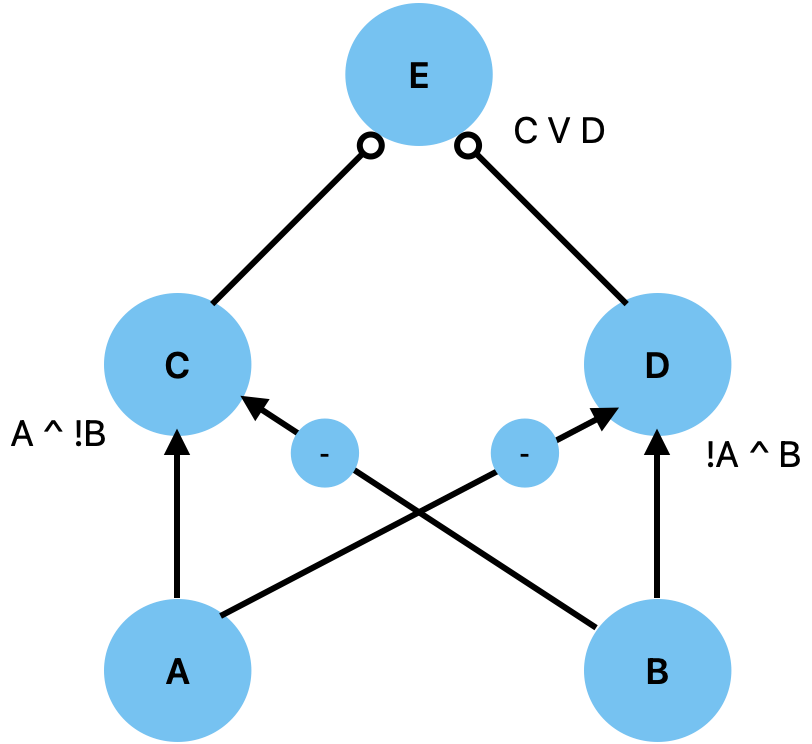

``` 
Q3. Why is preferable to use Logistic Regression classifier rather than classical Perceptron? How to tweak a Perceptron to make it equivalent to Logistic Regression Classifier? 
Ans: The classical perceptron will converge only if dataset is linearly separable. And it will not be able to measure class probabilities rather it will provide the score based on hard threshold. On Contrary, Logistic Regression classifier will converge to a good solution even if data is not linearly separable and output class will have probablities. 
However, if we change the Perceptron activation function to Logistic Activation function (or softmax activation function if number of neurons are more) and train it using Gradient Descent (minimizing cost function), then it becomes equivalent to Logistic Regression classifier

Q4: Why was Logistic activation function a key ingredient in training the first MLP? 
Ans: It is because the gradient of activation function becomes non-zero and it is easier to dinf the roll-down slope; step activation function would have yielded zero gradient (there in no slope) and it would have been difficult to find the loss. 

Q5. Name 3 popular activation function? Can you draw them? 
Ans: a. step function, logistic/sigmoid, hyperbolic tangent (tanh), relu

In [145]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

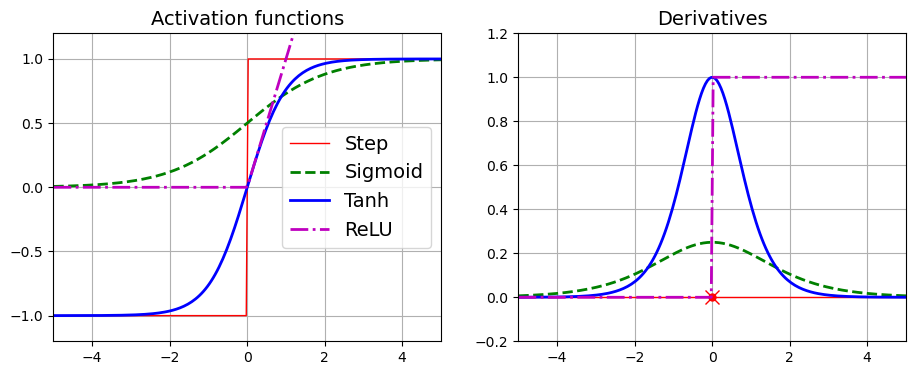

In [146]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# plot function 
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# plot the derivatives 
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

Q6. You created a MLP with input layer with 10 pass through neurons, followed by 50 artificial neurons in hidden layer. Finally one output layer with 3 neurons. All artifical neuron use Relu activation.
```
    - What is the shape of input matrix X 
    - What is the shape of hidden layers weight vector $W_h$ and $bias b_h$ 
    - What is the shape of output layers weight vector $W_o$ and $bias b_o$
    - Waht is the shape of network output matrix Y 
    - Write equation that computes output matrix Y as function of X, $W_h$, $b_h$, $W_o$, $b_o$

Ans: Input matrix shape = (m x 10) where m refers to training batch size 
```
Shape of hidden layer weight vector $W_h$ = 10 x 50 and $b_h$ = 50 <br>
Shape of output layer weight vector $W_o$ = 50 x 3 and $b_o$ = 3 <br>
Shape of network output matrix Y = m x 3; m is batch size <br>
<br><br>
Y = $Relu(Relu(X W_h + b_h)W_o + b_o)$
<br><br>
```
Q7: How many output neurons needed to classify email as ham or spam? What activation function to use in output layer? If you had to tackle MNIST dataset what would be the size now? What about predicting the housing price? 
Ans: 1 neuron should be good enough if classifying email as ham or spam. Activation function to use would be more probablistic in nature so Logistic/Sigmoid Activation function at output layer. For MNIST dataset, the total number of neurons in output layer would be 10 considering 10 different digits we want to classify. Activation function for output layer should be replaced with Softmax which will ensure the probablity is between 0 and 1. For Housing problem - it is a regression task (predicting the price of the house). We will need 8 neurons for each feature in input layer and output layer should have just 1 neuron. Also activation function will not be present for regression task in output layer.


Q8. What is backpropagation and how does it work? what is the difference between backpropagation and reverse mode autodiff? 
Ans: Backpropogation is ML technique used to train the artifical neural networks. It first computes gradient od the cost function with regard to every model parameters (weights and biases), then it performs gradient descent steps using these gradients. Backpropogation is performed atleast thousands/million time, using many training batches until the model parameters converge to the value that minimizes cost function. 

To compute gradient, backpropagation uses reverse mode autodiff. Reverse mode autodiff performs a forward pass through a computation graph, computing every single node's value for current training batch and then it performs a reverse pass, computing all gradients at once. 

Backpropogration refers to whole process of training ANN using multiple backpropogration steps. Each of which computes gradients and use them to perform a Gradient Descent step. In contrast to reverse mode autodiff is just a technique to compute gradients efficiently and used by backpropogation.

```
Q9. List all hyperparameters you can tweak in basic MLP? If MLP overfits the training data how to tweak these hyperparameters to try to solve the problem?
Ans: a. Number of hidden layers 
     b. Number of neurons per layer 
     c. Batch Size 
     d. Learning Rate 
     e. Optimizer 
     f. Activation Function 
     g. Number of iterations 

If MLP is overfitting try to reduce number of hidden layers or number of neurons per layer. 
Also you can employ early stopping to ensure model is not overtrained. 


Q10. Train a deep MLP on MNIST data - see if you can get a precision of over 98%

In [189]:
# get training set 
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full.shape

(60000, 28, 28)

In [190]:
# create validation set 
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

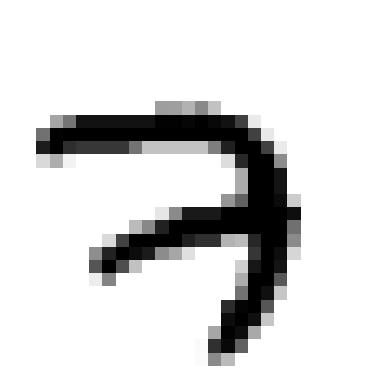

In [191]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [192]:
y_train[0]

np.uint8(7)

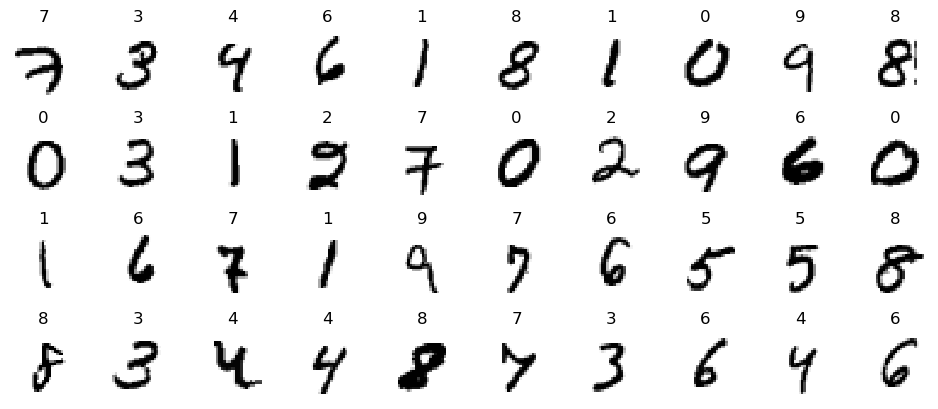

In [193]:
# create 40 images sample
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [194]:
# to grow learning rate for each iteration create a class which we will use during callback 
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])

In [195]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [196]:
# create a sequential model 
model = keras.models.Sequential([

    # take input in 28x28 format and flatten to 784 
    keras.layers.Flatten(input_shape=[28, 28]),

    # create hidden layer 1 with 300 neurons 
    keras.layers.Dense(300, activation="relu"),

    # create hidden layer 2 with 300 neurons 
    keras.layers.Dense(100, activation="relu"),

    # use 10 neurons for output layer with softmax activation 
    keras.layers.Dense(10, activation="softmax")
])

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [197]:
# compile the model and choose spare categorical cross entropy as loss function as labels are sparse 
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

# create exponential learning rate object with factor of 1.005
expon_lr = ExponentialLearningRate(factor=1.005)

In [198]:
# Just train with 1 epoch for getting the rates and losses 
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5078 - loss: 734207346379987770262159360.0000 - val_accuracy: 0.1126 - val_loss: 2.3911


Text(0, 0.5, 'Loss')

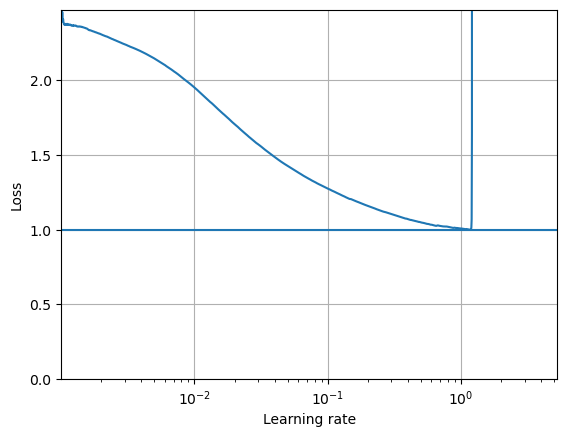

In [199]:
# plot the graph showing the increase of learning rate exponentially has resulted in decline of loss initially then sudden spike showing divergence
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

``` 
on x axis we can see log annotation. loss jumped between 0.1 and 1, i.e at 0.6 (represented as 6e-1); we will take half that learning rate i.e 3x10^-1 = 0.3 represented as 3e-1

In [200]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [201]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [202]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=["accuracy"])

In [203]:
run_logdir

'./DATA/Tensorboard_Logs/Chapter10_20250611174427'

In [204]:
root_logdir

'./DATA/Tensorboard_Logs'

In [205]:
run_logdir = get_run_logdir()

In [206]:
run_logdir

'./DATA/Tensorboard_Logs/Chapter10_20250611174710'

In [209]:
output_location = os.path.join(os.curdir, "OUTPUT", "Chapter10")

In [ ]:
# create early stopping checkpoint 
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

# save best model checkpoint 
checkpoint_cb = keras.callbacks.ModelCheckpoint(os.path.join(output_location, "my_mnist_model.keras"), save_best_only=True)

# tensorboard checkpoint
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8690 - loss: 0.4111 - val_accuracy: 0.9690 - val_loss: 0.1042
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9702 - loss: 0.0984 - val_accuracy: 0.9740 - val_loss: 0.0855
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9811 - loss: 0.0632 - val_accuracy: 0.9768 - val_loss: 0.0822
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9863 - loss: 0.0436 - val_accuracy: 0.9776 - val_loss: 0.0853
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9898 - loss: 0.0330 - val_accuracy: 0.9776 - val_loss: 0.0934
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0284 - val_accuracy: 0.9776 - val_loss: 0.0885
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9920 - loss: 0.0239 - val_accuracy: 0.9788 - val_loss: 0.0948
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9936 - loss: 0

In [210]:
model = keras.models.load_model(os.path.join(output_location, "my_mnist_model.keras")) # rollback to best model
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.9691 - loss: 0.0983


[0.08089205622673035, 0.974399983882904]